# Decision Trees for Classification

Decision Tree is classification algorithm to build a model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase/Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset['Up_Down'] = np.where(dataset['Return'].shift(-1) > dataset['Return'],'Up','Down')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
Date,,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658,Up
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500,Down
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,-1,0.012107,Down
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,-1,-1,0.000000,Down
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,-1,1,-0.021531,Up


In [4]:
dataset.shape

(1171, 11)

In [5]:
X = dataset.drop(['Up_Down', 'Close'], axis=1)  
y = dataset['Up_Down'] 

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 89  20]
 [ 25 101]]
             precision    recall  f1-score   support

       Down       0.78      0.82      0.80       109
         Up       0.83      0.80      0.82       126

avg / total       0.81      0.81      0.81       235



Text(0.5,257.44,'Predicted label')

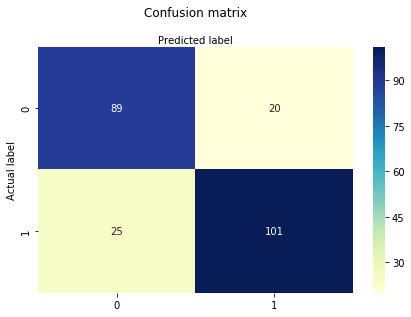

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8085106382978723
